In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")

Pandas version: 2.3.0+4.g1dfc98e16a
NumPy version: 1.23.5
Matplotlib version: 3.9.4
Seaborn version: 0.13.2


In [6]:
# 1. Load the Dataset
# Place your used car dataset (e.g., 'used_cars.csv') in the data/ directory
data_path = '../../data/placeholder_for_used_cars_dataset.csv'  # Relative path
print(f"Attempting to load data from: {data_path}")

# Create a dummy dataset for demonstration.  You'll need to replace this with your actual dataset.
# Example columns: 'make', 'model', 'year', 'mileage', 'fuel_type', 'transmission', 'selling_price'
try:
    df = pd.read_csv(data_path)
except FileNotFoundError:
    print("Warning: Data file not found. Creating a dummy DataFrame for demonstration.")
    data = {
        'make': ['Toyota', 'Honda', 'Ford', 'BMW', 'Toyota', 'Mercedes', 'Honda', 'Ford'],
        'model': ['Camry', 'Civic', 'Fusion', '3 Series', 'Corolla', 'C-Class', 'CRV', 'F-150'],
        'year': [2018, 2019, 2017, 2020, 2018, 2021, 2019, 2016],
        'mileage': [50000, 30000, 70000, 20000, 45000, 15000, 35000, 80000],
        'fuel_type': ['Petrol', 'Petrol', 'Petrol', 'Diesel', 'Petrol', 'Diesel', 'Petrol', 'Petrol'],
        'transmission': ['Automatic', 'Manual', 'Automatic', 'Automatic', 'Manual', 'Automatic', 'Automatic', 'Automatic'],
        'selling_price': [18000, 16000, 12000, 35000, 15000, 45000, 20000, 25000]
    }
    df = pd.DataFrame(data)
    df.to_csv(data_path, index=False)  # Save dummy data for later testing
    print("Dummy dataset created at `data/placeholder_for_used_cars_dataset.csv`.")
    df = pd.read_csv(data_path)  # Reload to ensure it reads from the file

print("\nOriginal DataFrame Head:")
print(df.head())
print("\nDataFrame Info:")
df.info()
print("\nMissing values before preprocessing:")
print(df.isnull().sum())

Attempting to load data from: ../../data/placeholder_for_used_cars_dataset.csv
Dummy dataset created at `data/placeholder_for_used_cars_dataset.csv`.

Original DataFrame Head:
     make     model  year  mileage fuel_type transmission  selling_price
0  Toyota     Camry  2018    50000    Petrol    Automatic          18000
1   Honda     Civic  2019    30000    Petrol       Manual          16000
2    Ford    Fusion  2017    70000    Petrol    Automatic          12000
3     BMW  3 Series  2020    20000    Diesel    Automatic          35000
4  Toyota   Corolla  2018    45000    Petrol       Manual          15000

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   make           8 non-null      object
 1   model          8 non-null      object
 2   year           8 non-null      int64 
 3   mileage        8 non-null      int64 
 4   fuel_t

In [7]:
# 1. Data Preprocessing Example
# Handling missing values (Dummy example: no missing values, but general approach)
# if df.isnull().sum().any():
#     # Impute numerical missing values (e.g., using the median)
#     for col in df.select_dtypes(include=np.number).columns:
#         if df[col].isnull().any():
#             df[col].fillna(df[col.median(), inplace=True)
#     # Impute categorical missing values (e.g., using the mode)
#     for col in df.select_dtypes(include='object').columns:
#         if df[col].isnull().any():
#             df[col].fillna(df[col].mode()[0], inplace=True)
print("\nMissing values after preprocessing (if any were present):")
print(df.isnull().sum())

# Encode categorical features (One-Hot Encoding)
categorical_cols = ['make', 'model', 'fuel_type', 'transmission']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)  # drop_first to avoid multicollinearity

print("\nDataFrame Head after One-Hot Encoding:")
print(df_encoded.head())
print(f"Original columns: {df.shape[1]}, Encoded columns: {df_encoded.shape[1]}")


Missing values after preprocessing (if any were present):
make             0
model            0
year             0
mileage          0
fuel_type        0
transmission     0
selling_price    0
dtype: int64

DataFrame Head after One-Hot Encoding:
   year  mileage  selling_price  make_Ford  make_Honda  make_Mercedes  \
0  2018    50000          18000      False       False          False   
1  2019    30000          16000      False        True          False   
2  2017    70000          12000       True       False          False   
3  2020    20000          35000      False       False          False   
4  2018    45000          15000      False       False          False   

   make_Toyota  model_C-Class  model_CRV  model_Camry  model_Civic  \
0         True          False      False         True        False   
1        False          False      False        False         True   
2        False          False      False        False        False   
3        False          False      F

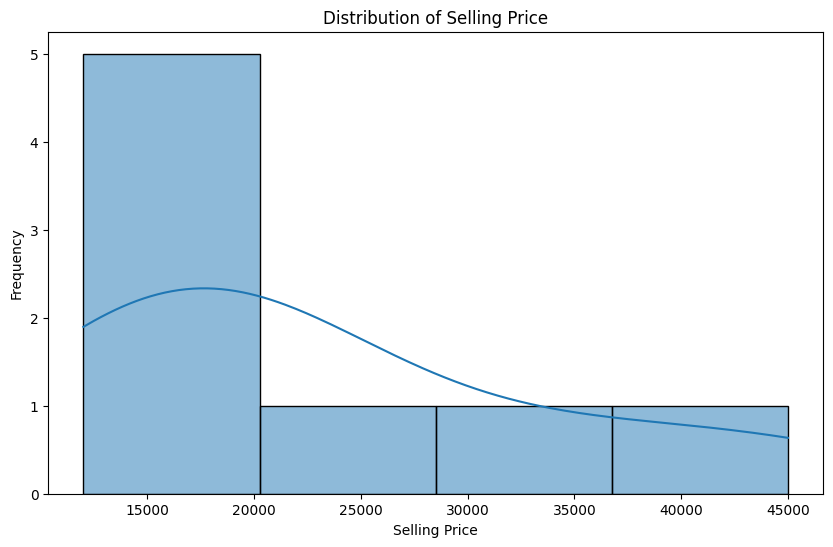

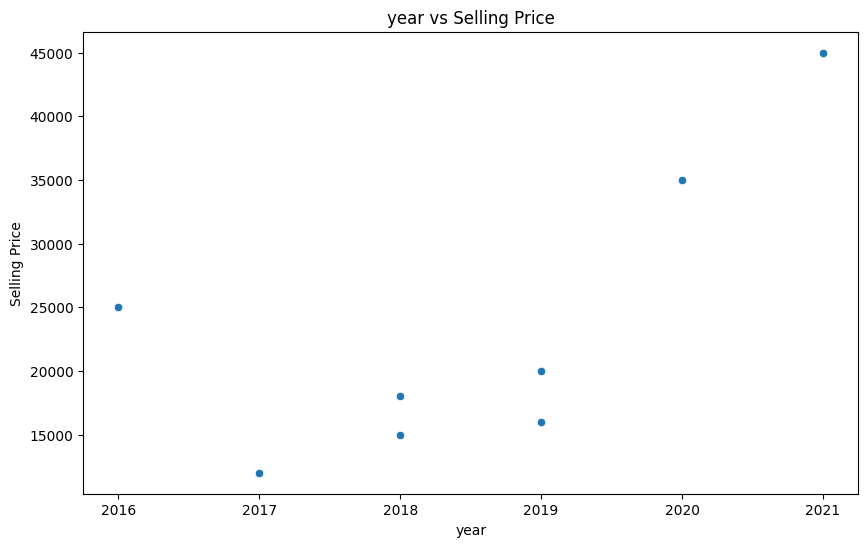

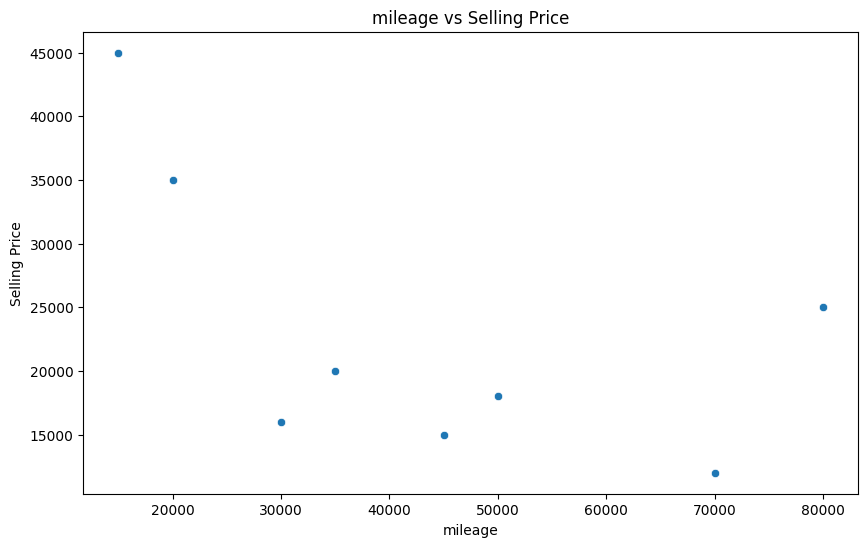

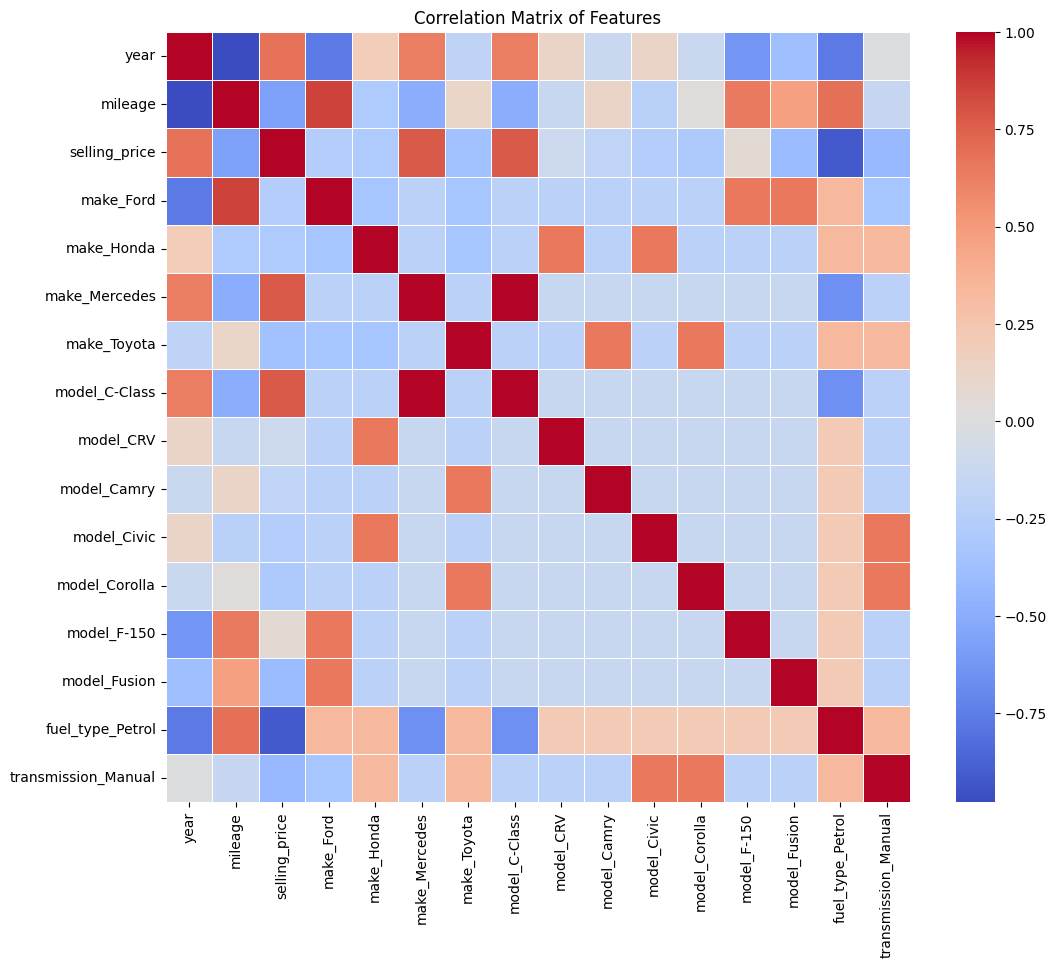


Milestone 3 tasks completed. Data prepared and visualized.


In [8]:
# 2. Data Visualization
# Target variable distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_encoded['selling_price'], kde=True)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

# Relationship between numerical features and price
numerical_cols = ['year', 'mileage']  # Assuming 'year' and 'mileage' are numerical
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df_encoded[col], y=df_encoded['selling_price'])
    plt.title(f'{col} vs Selling Price')
    plt.xlabel(col)
    plt.ylabel('Selling Price')
    plt.show()

# Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)  # annot=True for values
plt.title('Correlation Matrix of Features')
plt.show()

print("\nMilestone 3 tasks completed. Data prepared and visualized.")